In [1]:
# Requests for handling HTTP get and other requests
import requests
import time # import for playing nice and not getting blocked
import pandas as pd
# from BeautifulSoup4 import BeatifulSoup if installed through pip install BeautifulSoup4
# 
from bs4 import BeautifulSoup

In [ ]:
# if bs4 not found install it with
#  !pip install beatifulsoup4
# https://www.crummy.com/software/BeautifulSoup/

In [ ]:
!dir
# ar ! i can run command line commands

In [3]:
# centrs = "https://www.ss.com/lv/real-estate/flats/riga/centre/sell/"
url = "https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/"

In [4]:
req = requests.get(url) # so here we make a call to webpage via HTTP GET request and get something back
req.status_code # we could add if to check for 200

200

In [5]:
req.text[:200]

'<!DOCTYPE html>\r\n<HTML><HEAD>\r\n<title>SS.COM Mājas, vasarnīcas - Rīgas rajons, Cenas, Pārdod - Visi sludinājumi</title>\r\n<meta http-equiv="Content-Type" CONTENT="text/html; charset=UTF-8">\r\n<meta name'

In [6]:
req.text.count("Carn")

8

In [7]:
req.text.index("Carn")

680

In [ ]:
type(req)

In [ ]:
# req.json() will not work since this page is not JSON!

In [8]:
req.text[req.text.index("Carn"):req.text.index("Carn")+100] # we could do parsing by hand but usually we want to use a premade parser

'Carnikavas nov., Cenas, tirdzniecība, Foto, Attēli, Pārdod">\r\n<link rel="alternate" media="only scre'

In [9]:
# parser means structuring your text into some structure
soup = BeautifulSoup(req.text, 'lxml') # lxml is improved parser, a little bit more lenient
# soup = BeautifulSoup(req.text) # could use Python's built in HTML parser
soup.title

<title>SS.COM Mājas, vasarnīcas - Rīgas rajons, Cenas, Pārdod - Visi sludinājumi</title>

In [10]:
type(soup)

bs4.BeautifulSoup

In [11]:
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all
# https://developer.mozilla.org/en-US/docs/Web/HTML/Element/table
tables = soup.find_all("table") # finds ALL elements matching our filter
len(tables) 

11

In [12]:
# find finds just one match
headline = soup.find("tr", {"id":"head_line"}) # this is a shorter way of finding by tr AND this element having particular id
headline

<tr id="head_line">
<td class="msg_column" colspan="3" width="70%">
<span style="float:left;"> Sludinājumi
</span>
<span align="right" class="msg_column" style="float:right;text-align:right;padding-right:3px;">
<noindex>
<a class="a19" href="/lv/real-estate/homes-summer-residences/riga-region/all/sell/fDgSeF4S.html" rel="nofollow">datums</a></noindex></span>
</td>
<td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/homes-summer-residences/riga-region/all/sell/fDgSeF4bEFV8FQ==.html" rel="nofollow" title="">Pagasts</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/homes-summer-residences/riga-region/all/sell/fDgSeF4QelM=.html" rel="nofollow" title="">m2</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/homes-summer-residences/riga-region/all/sell/fDgSeF4WEjwT.html" rel="nofollow" title="">Stāvi</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a 

In [13]:
type(headline)

bs4.element.Tag

In [15]:
headtds = headline.find_all("td")
# td stands for table data
# https://developer.mozilla.org/en-US/docs/Web/HTML/Element/td 
headtds

[<td class="msg_column" colspan="3" width="70%">
 <span style="float:left;"> Sludinājumi
 </span>
 <span align="right" class="msg_column" style="float:right;text-align:right;padding-right:3px;">
 <noindex>
 <a class="a19" href="/lv/real-estate/homes-summer-residences/riga-region/all/sell/fDgSeF4S.html" rel="nofollow">datums</a></noindex></span>
 </td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/homes-summer-residences/riga-region/all/sell/fDgSeF4bEFV8FQ==.html" rel="nofollow" title="">Pagasts</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/homes-summer-residences/riga-region/all/sell/fDgSeF4QelM=.html" rel="nofollow" title="">m2</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/homes-summer-residences/riga-region/all/sell/fDgSeF4WEjwT.html" rel="nofollow" title="">Stāvi</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a cl

In [16]:
len(headtds) # so we have 8 table data elements

6

In [17]:
headline.text # this returns ALL text in headline and its children and grandchildren

'\n\n\xa0Sludinājumi\r\n\n\n\ndatums\n\nPagastsm2StāviZem. pl.Cena'

In [19]:
headtds[0].text # we do not need the first one

'\n\xa0Sludinājumi\r\n\n\n\ndatums\n'

In [20]:
headcolumns = [el.text for el in headtds[1:]] #.text gets us content even from children and grandchildren
headcolumns

['Pagasts', 'm2', 'Stāvi', 'Zem. pl.', 'Cena']

In [21]:
# lets combine the above cells into a function which will always get us columns
def getColList(soup):
    column_list = ["description","url"] # we decided to that we need these two column names no matter the html
    headline = soup.find("tr", {"id":"head_line"})
    headtds = headline.find_all("td")
    headcolumns = [el.text for el in headtds[1:]] # this will get all column names starting with 2nd in HTML
    column_list += headcolumns
    return column_list

In [22]:
column_names = getColList(soup)
column_names # to be used later when creating our table

['description', 'url', 'Pagasts', 'm2', 'Stāvi', 'Zem. pl.', 'Cena']

In [23]:
trows = soup.find_all('tr') # tr stands for table row
len(trows)


44

In [ ]:
# if i had no other choices I could find starting and end index by hand and hard code it
# but that is liable to change between pages

In [25]:
trows[9] # we coudl do it by hand

<tr id="tr_49527741"><td class="msga2 pp0"><input id="c49527741" name="mid[]" type="checkbox" value="49527741_15499_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/homes-summer-residences/riga-region/carnikavas-nov/gauja/aigii.html" id="im49527741"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/4/782/195339/39067646.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JUE1JTlBJThEdHklODAlQzclOUYlOUIlODl0ciU4MiU4MyVBNyU5QyU4OXJzJTgxJTdCJTlGJTk1JTg5cg==|neYBBKK" href="/msg/lv/real-estate/homes-summer-residences/riga-region/carnikavas-nov/gauja/aigii.html" id="dm_49527741">Tiek pārdota omulīga privātmāja Gaujā. Ir veikts vērtējums bankām. 
</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Carnikavas nov.<br/>Gauja</td><td c="1" class="msga2-o pp6" nowrap="">210</td><td c="1" class="msga2-o pp6" nowrap="">2</td><td c="1" class="msga2-o pp6" nowrap="">1000 m²</td><td c="1" class="msga2-o pp6" nowrap="">160,000  €</td></tr>

In [19]:
trows[6] # so could take trows[6:35] downside is that this is fixed with magic numbers

<tr id="tr_49479169"><td class="msga2 pp0"><input id="c49479169" name="mid[]" type="checkbox" value="49479169_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/efmid.html" id="im49479169"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/1/183/45589/9117785.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JUE4JTlEJUFCJTk1JTk0JUNBJUE0JTlFJUE1JTk1JTkzJTgwJUFBJTk4JUFBJTk1JTlCJTgxJUE0JTk4JUE5JTk1JTkyJTdF|shtebN" href="/msg/lv/real-estate/flats/riga/centre/efmid.html" id="dm_49479169">Balkons, panorāmas skats. 
Brīnišķīgs, plašs dzīvoklis fasādes </a></div></td><td c="1" class="msga2-o pp6" nowrap="">Baznīcas 13</td><td c="1" class="msga2-o pp6" nowrap="">3</td><td c="1" class="msga2-o pp6" nowrap="">126</td><td c="1" class="msga2-o pp6" nowrap="">5/6</td><td c="1" class="msga2-o pp6" nowrap="">P. kara</td><td c="1" class="msga2-o pp6" nowrap="">2,302 €</td><td c="1" class="msga2-o pp6" nowrap="">290,000  €</td></tr>

In [26]:
trows[9]["id"], trows[9].get("id") # get is safer since not all elements have ids

('tr_49527741', 'tr_49527741')

In [27]:
# hardest part in this 
# how to filter only specific rows
# we need to find something that is unique to our apartment rows but not to the extra rows
# remember we id is not guaranteed, so "" gives us default value when there is no id
apt_rows = [row for row in trows if row.get('id',"").startswith("tr_") and not row.get('id',"").startswith("tr_bnr") ]
len(apt_rows)

30

In [28]:
apt_rows[-1]

<tr id="tr_49738506"><td class="msga2 pp0"><input id="c49738506" name="mid[]" type="checkbox" value="49738506_15519_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/homes-summer-residences/riga-region/incukalna-nov/meza-miers/amhol.html" id="im49738506"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/4/798/199438/39887520.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JTk3Y2UlOTl6JUEzJTlBJUFEZiU5OSU3QiVBMCU5Q2ZoJTk0dyVBMiU5QWZoJTk0dCU5RSU5NmE=|f15dCn" href="/msg/lv/real-estate/homes-summer-residences/riga-region/incukalna-nov/meza-miers/amhol.html" id="dm_49738506">Īpašnieks pārdod zemi ar jaunbūvi lauku teritorijā klusā vietā. 
La</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Inčukalna nov.<br/>Meža miers</td><td c="1" class="msga2-o pp6" nowrap="">182</td><td c="1" class="msga2-o pp6" nowrap="">2</td><td c="1" class="msga2-o pp6" nowrap="">2628 m²</td><td c="1" class="msga2-o pp6" nowrap="">115,000  €</td></tr>

In [ ]:
apt_rows[0]

In [29]:
# lets make a function from the above doodle and make it work on most pages on SS
def getRowList(soup):
    trows = soup.find_all('tr')
    aprows = [row for row in trows if row.get('id',"").startswith("tr_") and not row.get('id',"").startswith("tr_bnr") ]
    return aprows

In [30]:
apt_rows = getRowList(soup)
len(apt_rows)

30

In [32]:
first_ad = apt_rows[0]
first_ad

<tr id="tr_49527741"><td class="msga2 pp0"><input id="c49527741" name="mid[]" type="checkbox" value="49527741_15499_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/homes-summer-residences/riga-region/carnikavas-nov/gauja/aigii.html" id="im49527741"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/4/782/195339/39067646.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JUE1JTlBJThEdHklODAlQzclOUYlOUIlODl0ciU4MiU4MyVBNyU5QyU4OXJzJTgxJTdCJTlGJTk1JTg5cg==|neYBBKK" href="/msg/lv/real-estate/homes-summer-residences/riga-region/carnikavas-nov/gauja/aigii.html" id="dm_49527741">Tiek pārdota omulīga privātmāja Gaujā. Ir veikts vērtējums bankām. 
</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Carnikavas nov.<br/>Gauja</td><td c="1" class="msga2-o pp6" nowrap="">210</td><td c="1" class="msga2-o pp6" nowrap="">2</td><td c="1" class="msga2-o pp6" nowrap="">1000 m²</td><td c="1" class="msga2-o pp6" nowrap="">160,000  €</td></tr>

In [33]:
row_tds = first_ad.find_all('td') # get all table data elements from first ad/row
len(row_tds)

8

In [34]:
row_tds

[<td class="msga2 pp0"><input id="c49527741" name="mid[]" type="checkbox" value="49527741_15499_0"/></td>,
 <td class="msga2"><a href="/msg/lv/real-estate/homes-summer-residences/riga-region/carnikavas-nov/gauja/aigii.html" id="im49527741"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/4/782/195339/39067646.th2.jpg"/></a></td>,
 <td class="msg2"><div class="d1"><a class="am" data="JUE1JTlBJThEdHklODAlQzclOUYlOUIlODl0ciU4MiU4MyVBNyU5QyU4OXJzJTgxJTdCJTlGJTk1JTg5cg==|neYBBKK" href="/msg/lv/real-estate/homes-summer-residences/riga-region/carnikavas-nov/gauja/aigii.html" id="dm_49527741">Tiek pārdota omulīga privātmāja Gaujā. Ir veikts vērtējums bankām. 
 </a></div></td>,
 <td c="1" class="msga2-o pp6" nowrap="">Carnikavas nov.<br/>Gauja</td>,
 <td c="1" class="msga2-o pp6" nowrap="">210</td>,
 <td c="1" class="msga2-o pp6" nowrap="">2</td>,
 <td c="1" class="msga2-o pp6" nowrap="">1000 m²</td>,
 <td c="1" class="msga2-o pp6" nowrap="">160,000  €</td>]

In [35]:
row_tds[0].text

''

In [36]:
row_tds[1].text

''

In [37]:
row_tds[1].attrs # we can see elements attributes

{'class': ['msga2']}

In [38]:
img = row_tds[1].find("img")
img

<img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/4/782/195339/39067646.th2.jpg"/>

In [39]:
img.get("src")

'https://i.ss.com/gallery/4/782/195339/39067646.th2.jpg'

In [40]:
row_tds[2].text # 3rd element has the description

'Tiek pārdota omulīga privātmāja Gaujā. Ir veikts vērtējums bankām. \r'

In [41]:
row_tds[-1].text # last element has the price

'160,000  €'

In [42]:
a = row_tds[1].find('a') # a tag is called anchor tag
a

<a href="/msg/lv/real-estate/homes-summer-residences/riga-region/carnikavas-nov/gauja/aigii.html" id="im49527741"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/4/782/195339/39067646.th2.jpg"/></a>

In [43]:
a.attrs

{'href': '/msg/lv/real-estate/homes-summer-residences/riga-region/carnikavas-nov/gauja/aigii.html',
 'id': 'im49527741'}

In [44]:
a.get('href'), a['href']

('/msg/lv/real-estate/homes-summer-residences/riga-region/carnikavas-nov/gauja/aigii.html',
 '/msg/lv/real-estate/homes-summer-residences/riga-region/carnikavas-nov/gauja/aigii.html')

In [45]:
column_names

['description', 'url', 'Pagasts', 'm2', 'Stāvi', 'Zem. pl.', 'Cena']

In [46]:
# from row get dictionary with values 
def getRow(row,colist=column_names):
    row_tds = row.find_all('td')
    rowDict = {}
    if len(row_tds) < 3: # a little sanity check
        print("Hmm bad row")
        return rowDict
    
    rowDict[colist[0]] = row_tds[2].text # so the big assumption is that we always get description in 3rd column
    rowDict[colist[1]] = "https://ss.com" + row_tds[1].find('a').get('href')
    for td,key in zip(row_tds[3:],colist[2:]): 
        rowDict[key] = td.text
    return rowDict

In [40]:
apt_rows[0] # first row of ads

<tr id="tr_49160161"><td class="msga2 pp0"><input id="c49160161" name="mid[]" type="checkbox" value="49160161_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/enfmg.html" id="im49160161"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/4/755/188609/37721601.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="ayVBNWwlQUN1biVGMSVBM2glQTJmJUE1em4lQUElQUJqJUE2aiVBQnFrJUE1JUEyYg==|2p6tA7ur" href="/msg/lv/real-estate/flats/riga/centre/enfmg.html" id="dm_49160161">Augstas kvalitātes Jūgendstila dizaina dzīvoklis tikko pēc renov</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Pulkv. Brieža 11</td><td c="1" class="msga2-o pp6" nowrap="">3</td><td c="1" class="msga2-o pp6" nowrap="">90</td><td c="1" class="msga2-o pp6" nowrap="">3/5</td><td c="1" class="msga2-o pp6" nowrap="">P. kara</td><td c="1" class="msga2-o pp6" nowrap="">2,889 €</td><td c="1" class="msga2-o pp6" nowrap="">260,000  €</td></tr>

In [47]:
getRow(apt_rows[0])

{'description': 'Tiek pārdota omulīga privātmāja Gaujā. Ir veikts vērtējums bankām. \r',
 'url': 'https://ss.com/msg/lv/real-estate/homes-summer-residences/riga-region/carnikavas-nov/gauja/aigii.html',
 'Pagasts': 'Carnikavas nov.Gauja',
 'm2': '210',
 'Stāvi': '2',
 'Zem. pl.': '1000 m²',
 'Cena': '160,000  €'}

In [48]:
getRow(first_ad)

{'description': 'Tiek pārdota omulīga privātmāja Gaujā. Ir veikts vērtējums bankām. \r',
 'url': 'https://ss.com/msg/lv/real-estate/homes-summer-residences/riga-region/carnikavas-nov/gauja/aigii.html',
 'Pagasts': 'Carnikavas nov.Gauja',
 'm2': '210',
 'Stāvi': '2',
 'Zem. pl.': '1000 m²',
 'Cena': '160,000  €'}

In [49]:
# so if we know how to work on single row then we can do process multiple rows
def getRows(rowlist,colist=column_names):
    return [getRow(row, colist=colist) for row in rowlist] # so return a list of dictionaries


In [50]:
row_ads = getRows(apt_rows)
row_ads[-3:] # last 3 ads

[{'description': 'Ekskluzīvas divstāvu mājas Jaunajā projektā “Dižozolu nami”, Mārupē.',
  'url': 'https://ss.com/msg/lv/real-estate/homes-summer-residences/riga-region/marupes-pag/marupe/epknx.html',
  'Pagasts': 'Mārupes pag.Mārupe',
  'm2': '176',
  'Stāvi': '2',
  'Zem. pl.': '594 m²',
  'Cena': '245,000  €'},
 {'description': 'Lieliska vasarnīca, kura ir apdzīvojama arī ziemas laikā, iekurinot ',
  'url': 'https://ss.com/msg/lv/real-estate/homes-summer-residences/riga-region/carnikavas-nov/siguli/jedhk.html',
  'Pagasts': 'Carnikavas nov.Siguļi',
  'm2': '88',
  'Stāvi': '2',
  'Zem. pl.': '600 m²',
  'Cena': '64,800  €'},
 {'description': 'Īpašnieks pārdod zemi ar jaunbūvi lauku teritorijā klusā vietā. \r\nLa',
  'url': 'https://ss.com/msg/lv/real-estate/homes-summer-residences/riga-region/incukalna-nov/meza-miers/amhol.html',
  'Pagasts': 'Inčukalna nov.Meža miers',
  'm2': '182',
  'Stāvi': '2',
  'Zem. pl.': '2628 m²',
  'Cena': '115,000  €'}]

In [51]:
dtemp = pd.DataFrame(row_ads, columns=column_names)
dtemp.shape

(30, 7)

In [52]:
dtemp.head()

,description,url,Pagasts,m2,Stāvi,Zem. pl.,Cena
0,Tiek pārdota omulīga privātmāja Gaujā. Ir veik...,https://ss.com/msg/lv/real-estate/homes-summer...,Carnikavas nov.Gauja,210,2,1000 m²,"160,000 €"
1,Pārdodu zemes gabala domājamo daļu 750 kv. m. ...,https://ss.com/msg/lv/real-estate/homes-summer...,Mārupes pag.Mārupe,203,2,750 m²,"135,000 €"
2,Kārtīgi celta māja ar sakoptu dārzu un siltumn...,https://ss.com/msg/lv/real-estate/homes-summer...,Saulkrasti,85,2,580 m²,"46,800 €"
3,Pārdod māju Katlakalnā. Māja atrodas lieliskā ...,https://ss.com/msg/lv/real-estate/homes-summer...,Ķekavas pag.Katlakalns,278,2,1200 m²,"265,000 €"
4,Дом у озера в Букулты на продажу\r\n\r\nПланир...,https://ss.com/msg/lv/real-estate/homes-summer...,Garkalnes nov.Bukulti,590,3,1900 m²,"349,000 €"


In [53]:
dtemp.to_excel("rigas_rajons30.xlsx")

In [54]:
# so with this function I can get full dataframe from a single page on ss.com not only apartments
def getDFfromURL(url):
    # print("getting data from", url)
    req = requests.get(url)
    if req.status_code != 200:
        print("Request Fail with", req.status_code)
        return None # maybe return empty dataframe here
    soup = BeautifulSoup(req.text, 'lxml')
    column_names = getColList(soup)
    rowlist = getRowList(soup)
    rows = getRows(rowlist,colist=column_names)
    return pd.DataFrame(rows, columns=column_names)
    

In [48]:
# centrs

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [49]:
imanta = "https://www.ss.com/lv/real-estate/flats/riga/imanta/sell/"
idf = getDFfromURL(imanta)
idf.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,"Продаётся большая , шикарная квартира на 3 эта...",https://ss.com/msg/lv/real-estate/flats/riga/i...,Slokas 205a,3,74,3/5,LT proj.,"1,284 €","95,000 €"
1,"Dzīvoklis nav stūra, sauss un silts. \r\nSlēdz...",https://ss.com/msg/lv/real-estate/flats/riga/i...,Slokas 185,1,27,5/5,LT proj.,"1,141 €","30,800 €"
2,"Pārdod atbrīvotu, gaišu, saulainu dzīvokli (na...",https://ss.com/msg/lv/real-estate/flats/riga/i...,M. Krūmu 20,1,37,9/9,602.,892 €,"33,000 €"
3,Продается ухоженная меблированная квартира в И...,https://ss.com/msg/lv/real-estate/flats/riga/i...,Kurzemes pr. 110,3,62,9/9,602.,"1,258 €","78,000 €"
4,"Piedāvāju iegādāties mājīgu, saulainu un siltu...",https://ss.com/msg/lv/real-estate/flats/riga/i...,Dammes 15,3,63,6/9,602.,"1,159 €","73,000 €"


In [50]:
df = getDFfromURL(centrs) # this will involve calling web page

In [55]:
url

'https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/'

In [56]:
df = getDFfromURL(url)
df.shape

(30, 7)

In [51]:
df.shape

(30, 9)

In [57]:
df.head()

,description,url,Pagasts,m2,Stāvi,Zem. pl.,Cena
0,Pārdošanā plaša un mājīga divu stāvu māja ļoti...,https://ss.com/msg/lv/real-estate/homes-summer...,Sigulda,480,3,1928 m²,"250,000 €"
1,Tiek pārdota omulīga privātmāja Gaujā. Ir veik...,https://ss.com/msg/lv/real-estate/homes-summer...,Carnikavas nov.Gauja,210,2,1000 m²,"160,000 €"
2,Pārdodu zemes gabala domājamo daļu 750 kv. m. ...,https://ss.com/msg/lv/real-estate/homes-summer...,Mārupes pag.Mārupe,203,2,750 m²,"135,000 €"
3,Kārtīgi celta māja ar sakoptu dārzu un siltumn...,https://ss.com/msg/lv/real-estate/homes-summer...,Saulkrasti,85,2,580 m²,"46,800 €"
4,Pārdod māju Katlakalnā. Māja atrodas lieliskā ...,https://ss.com/msg/lv/real-estate/homes-summer...,Ķekavas pag.Katlakalns,278,2,1200 m²,"265,000 €"


In [58]:

# https://developer.mozilla.org/en-US/docs/Web/HTML/Element/a
anchors = soup.find_all("a")
len(anchors) # anchors are popular in pages

119

In [59]:
anchors[:5]

[<a href="/" title="Sludinājumi"><img alt="Sludinājumi" border="0" class="page_header_logo" src="https://i.ss.com/img/p.gif"/></a>,
 <a class="a_menu" href="/lv/real-estate/homes-summer-residences/new/" title="Iesniegt Sludinājumu">Iesniegt Sludinājumu</a>,
 <a class="a_menu" href="/lv/login/" title="Mani Sludinājumi">Mani Sludinājumi</a>,
 <a class="a_menu" href="/lv/real-estate/homes-summer-residences/riga-region/search/" title="Meklēt sludinājumus">Meklēšana</a>,
 <a class="a_menu" href="/lv/favorites/" title="Memo">Memo</a>]

In [60]:
navs = [anchor for anchor in anchors if anchor.get("name") == "nav_id"] # get will get us None if no "name" exists
len(navs)

10

In [61]:
navs

[<a class="navi" href="/lv/real-estate/homes-summer-residences/riga-region/all/sell/page17.html" name="nav_id" rel="prev"><img border="0" height="5" src="https://i.ss.com/img/s_left.png" style="padding-bottom:2px;" width="9"/> Iepriekšējie</a>,
 <a class="navi" href="/lv/real-estate/homes-summer-residences/riga-region/all/sell/page2.html" name="nav_id" rel="next">2</a>,
 <a class="navi" href="/lv/real-estate/homes-summer-residences/riga-region/all/sell/page3.html" name="nav_id" rel="next">3</a>,
 <a class="navi" href="/lv/real-estate/homes-summer-residences/riga-region/all/sell/page4.html" name="nav_id" rel="next">4</a>,
 <a class="navi" href="/lv/real-estate/homes-summer-residences/riga-region/all/sell/page5.html" name="nav_id" rel="next">5</a>,
 <a class="navi" href="/lv/real-estate/homes-summer-residences/riga-region/all/sell/page6.html" name="nav_id" rel="next">6</a>,
 <a class="navi" href="/lv/real-estate/homes-summer-residences/riga-region/all/sell/page7.html" name="nav_id" rel="

In [62]:
navs[0]

<a class="navi" href="/lv/real-estate/homes-summer-residences/riga-region/all/sell/page17.html" name="nav_id" rel="prev"><img border="0" height="5" src="https://i.ss.com/img/s_left.png" style="padding-bottom:2px;" width="9"/> Iepriekšējie</a>

In [63]:
navs[0].attrs

{'name': 'nav_id',
 'rel': ['prev'],
 'class': ['navi'],
 'href': '/lv/real-estate/homes-summer-residences/riga-region/all/sell/page17.html'}

In [64]:
navs[0]['href']

'/lv/real-estate/homes-summer-residences/riga-region/all/sell/page17.html'

In [65]:
# could use regular expression here but we can use split 
afterpage = navs[0]['href'].split("/page")[-1] # -1 might be safer than 1 in case there is region with name page
afterpage

'17.html'

In [66]:
beforedot = afterpage.split(".html")[0]
beforedot

'17'

In [67]:
lastpage = int(beforedot)
lastpage

17

In [ ]:
# so now we put everything we just did in a single function

In [68]:
def getAllLocalUrls(url):
    """Get a list of all urls including paginated pages"""
    results = [url] # default is just the url if no extra pages found, teiksim Bolderājai...
    req = requests.get(url)
    if req.status_code != 200:
        print(f"Bad response! {req.status_code}")
        return []
    soup = BeautifulSoup(req.text, 'lxml')
    # we just need a one element
    prevanchor = soup.find('a', {"rel":"prev"}) # find finds first match only
    if prevanchor == None: # means there is only one page of ads
        return results
    href = prevanchor.attrs.get('href')
    lastPageNum = int(href.split('/page')[-1].split('.html')[0])
    print("Last page is",lastPageNum)
    nurls = [f"{url}page{n}.html" for n in range(2,lastPageNum+1)]
    results += nurls
    return results

In [66]:
centrs

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [69]:
url

'https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/'

In [70]:
local_urls = getAllLocalUrls(url)
len(local_urls),local_urls[:3],local_urls[-1]

Last page is 17


(17,
 ['https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/',
  'https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page2.html',
  'https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page3.html'],
 'https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page17.html')

In [68]:
dlast = getDFfromURL(local_urls[-1])
dlast.shape

(30, 9)

In [69]:
dlast

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,Kvartāls B91 - jauni mēbelēti dzīvokļi renovēt...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Brīvības 91,2,42,5/6,Renov.,"2,690 €","113,000 €"
1,Kvartāls B91 - jauni dzīvokļi renovētā ēkā Rīg...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Brīvības 91,2,49,3/6,Renov.,"2,408 €","118,000 €"
2,Kvartāls B91 - jauni mēbelēti dzīvokļi renovēt...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Brīvības 91,1,28,1/6,Renov.,"2,464 €","69,000 €"
3,Īpašnieks pārdod mājīgu un siltu mansarda dzīv...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Vārnu 8,3,60,6/6,P. kara,"1,648 €","98,900 €"
4,Piedāvājam 3 istabu dzīvokli pilnīgi renovētā ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Blaumaņa 12,3,64,6/6,Renov.,"2,650 €","169,600 €"
5,Продается солнечная полностью меблированная 3х...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Cēsu 23,3,66,3/6,Renov.,"2,333 €","154,000 €"
6,Pārdod divu istabu dzīvokli Centrā\r\n\r\nDzīv...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Matīsa 20,2,59,3/3,P. kara,"1,051 €","62,000 €"
7,Divu izolētu iztabu dzīvoklis ar atsevišķu iee...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Tērbatas 82,2,60,1/5,P. kara,"1,248 €","74,889 €"
8,Lv/rus/eng\r\nEkonomisks dzīvoklis pec Vastu. ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Bruņinieku 28,4,120,3/6,P. kara,"2,483 €","298,000 €"
9,Īpašnieks pārdod dzīvojamā mājā telpas ēkas pi...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Stabu 84,2,82,1/4,P. kara,610 €,"50,000 €"


In [71]:
def get_all_ads_df(start_url, save_excel_path=None):
    df_list=[] # so we will save our dataframes in a list
    local_urls = getAllLocalUrls(start_url)
    for url in local_urls:
        print(f"Gathering data from {url}")
        df_list.append(getDFfromURL(url))
        time.sleep(0.3) # we need this to play nice! to avoid rate limit or IP ban!!
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
    big_df = pd.concat(df_list) # then make a big dataframe from all the small dataframes
    if save_excel_path:
        big_df.to_excel(save_excel_path)
    return big_df
    

In [72]:
centrs

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [72]:
url

'https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/'

In [74]:
riga_region = get_all_ads_df(url, "riga_region_sep28.xlsx")

Last page is 17
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page2.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page3.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page4.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page5.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page6.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page7.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page8.html
Gathering data from https://www.ss.com/lv/real-estate/homes-summer-residences/riga-region/all/sell/page9.html
Gath

In [75]:
riga_region.shape

(506, 7)

In [76]:
riga_region.head(10)

,description,url,Pagasts,m2,Stāvi,Zem. pl.,Cena
0,Pārdošanā plaša un mājīga divu stāvu māja ļoti...,https://ss.com/msg/lv/real-estate/homes-summer...,Sigulda,480,3,1928 m²,"250,000 €"
1,Tiek pārdota omulīga privātmāja Gaujā. Ir veik...,https://ss.com/msg/lv/real-estate/homes-summer...,Carnikavas nov.Gauja,210,2,1000 m²,"160,000 €"
2,Pārdodu zemes gabala domājamo daļu 750 kv. m. ...,https://ss.com/msg/lv/real-estate/homes-summer...,Mārupes pag.Mārupe,203,2,750 m²,"135,000 €"
3,Kārtīgi celta māja ar sakoptu dārzu un siltumn...,https://ss.com/msg/lv/real-estate/homes-summer...,Saulkrasti,85,2,580 m²,"46,800 €"
4,Pārdod māju Katlakalnā. Māja atrodas lieliskā ...,https://ss.com/msg/lv/real-estate/homes-summer...,Ķekavas pag.Katlakalns,278,2,1200 m²,"265,000 €"
5,Дом у озера в Букулты на продажу\r\n\r\nПланир...,https://ss.com/msg/lv/real-estate/homes-summer...,Garkalnes nov.Bukulti,590,3,1900 m²,"349,000 €"
6,"Дом в Суниши. \r\nНаходится в частной, закрыто...",https://ss.com/msg/lv/real-estate/homes-summer...,Garkalnes nov.Sunīši,192,2,1346 m²,"315,000 €"
7,"Brīnišķīgs īpašums, pašā Mārupes sirdī, grezna...",https://ss.com/msg/lv/real-estate/homes-summer...,Mārupes pag.Mārupe,226,2,1352 m²,"490,000 €"
8,Tiek pārdota kapitāli un rūpīgi būvēta privātm...,https://ss.com/msg/lv/real-estate/homes-summer...,Babītes pag.Spilve,199,1,1573 m²,"300,000 €"
9,"Mājīgs īpašums Dreiliņos - rindu mājā, kas noz...",https://ss.com/msg/lv/real-estate/homes-summer...,Stopiņu nov.Dreiliņi,221,2,626 m²,"230,000 €"


In [77]:
riga_region.tail(10)

,description,url,Pagasts,m2,Stāvi,Zem. pl.,Cena
16,Продается двухэтажный кирпичный дом с ухоженны...,https://ss.com/msg/lv/real-estate/homes-summer...,Inčukalna nov.Egļupe,112,2,643 m²,"36,000 €"
17,"Pārdodu kvalitatīvu, skaistu un ļoti siltu māj...",https://ss.com/msg/lv/real-estate/homes-summer...,Olaines pag.Jaunolaine,240,2,900 m²,"239,000 €"
18,Продается новостройка в стадии строительства -...,https://ss.com/msg/lv/real-estate/homes-summer...,Salaspils l. t.Piķurgas,78,1,1200 m²,"78,000 €"
19,"Pārdošanā mājīgs īpašums privātmāju ciematā ""P...",https://ss.com/msg/lv/real-estate/homes-summer...,Garkalnes nov.Upesciems,153,1,1045 m²,"261,700 €"
20,Pārdod mūsdienīgu energoefektīvu privātmāju ar...,https://ss.com/msg/lv/real-estate/homes-summer...,Stopiņu nov.Vālodzes,235,2,1000 m²,"390,000 €"
21,"Lat: Laba vasarnīca labā vietā, netālu no Rīga...",https://ss.com/msg/lv/real-estate/homes-summer...,Saulkrastu l. t.Priedes,100,2,600 m²,"28,000 €"
22,"Расположен в 10 км от Юрмалы, 7 км от аэропорт...",https://ss.com/msg/lv/real-estate/homes-summer...,Babītes pag.Liberi,520,4,1861 m²,"440,000 €"
23,Īpašnieks pārdod privātmāju ar kopējo platību ...,https://ss.com/msg/lv/real-estate/homes-summer...,Salaspils l. t.Pikalne,99,1,352 m²,"77,000 €"
24,"Pārdod zemi ar mājiņu, kurā ir ievikts ūdens, ...",https://ss.com/msg/lv/real-estate/homes-summer...,Inčukalna nov.Egļupe,25,1,16000 m²,"35,000 €"
25,Dzīvojamā māja ar baseinu un savu dīķi klusā v...,https://ss.com/msg/lv/real-estate/homes-summer...,Carnikavas nov.Kalngale,494,3,2400 m²,"290,000 €"


In [73]:
agens = "https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/"
df = get_all_ads_df(agens, "agens_27_09.xlsx")
df.head()

Last page is 3
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/page2.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/agenskalns/sell/page3.html


,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,"In a prestigious new building, with an excelle...",https://ss.com/msg/lv/real-estate/flats/riga/a...,Kalnciema 9a,3,84,4/10,Jaun.,"2,101 €","176,500 €"
1,Pārdod divistabu dzīvokli Āgenskalnā. Pie māja...,https://ss.com/msg/lv/real-estate/flats/riga/a...,Raņķa d. 7/3,2,42,1/5,Hrušč.,"1,512 €","63,500 €"
2,"Pārdod vienistabas dzīvokli Āgenskalnā, pretīm...",https://ss.com/msg/lv/real-estate/flats/riga/a...,Ventspils 25,1,24,2/2,P. kara,496 €,"11,900 €"
3,Steidzami tiek pārdots 2-istabas dzīvoklis. \r...,https://ss.com/msg/lv/real-estate/flats/riga/a...,Auces 3,2,47,3/3,P. kara,"2,085 €","98,000 €"
4,Pārdod jauku un mājīgu 2 istabu dzīvokli Āgens...,https://ss.com/msg/lv/real-estate/flats/riga/a...,Ventspils 13,2,50,1/5,P. kara,800 €,"40,000 €"


In [74]:
df.shape

(90, 9)

In [75]:
df = get_all_ads_df(centrs, "centrs_27_09.xlsx")

Last page is 21
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page2.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page3.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page4.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page5.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page6.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page7.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page8.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page9.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page10.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page11.html
Gathering data from http

In [76]:
df.shape

(630, 9)

In [77]:
df.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,Augstas kvalitātes Jūgendstila dizaina dzīvokl...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Pulkv. Brieža 11,3,90,3/5,P. kara,"2,889 €","260,000 €"
1,"Balkons, panorāmas skats. \r\nBrīnišķīgs, plaš...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Baznīcas 13,3,126,5/6,P. kara,"2,302 €","290,000 €"
2,"Par samazinātu cenu, ar apgrūtinājumiem, īpašn...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Ganību d. 13,2,39,2/6,Jaun.,"1,603 €","62,500 €"
3,"Продаю отремонтированную, полностью меблирован...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Hospitāļu 7,3,69,1/5,Specpr.,"1,348 €","93,000 €"
4,"Plašs, pārdomāts studijas tipa dzīvoklis Vecrī...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Jēkaba 26/28,1,54,4/5,Renov.,"1,667 €","90,000 €"


In [78]:
df.tail()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
25,Супер предложение Продает хозяин самая дешёвая...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Ausekļa 5,5,162,2/6,Renov.,"2,222 €","360,000 €"
26,Tiek pārdots 3 - istabu dzīvoklis renovētā māj...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Elizabetes 22,3,72,4/6,Renov.,"2,486 €","179,000 €"
27,Pārdod gaišu studijas tipa vienistabas dzīvokl...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Vagonu 24,1,29,2/2,P. kara,931 €,"27,000 €"
28,"Продается светлая, солнечная 3 комнатная кварт...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Miera 93,3,65,5/7,Jaun.,"2,262 €","147,000 €"
29,"Pārdodu nevis stūra, sausu un siltu 2 istabu d...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Lāčplēša 62/66,2,50,3/5,P. kara,"1,220 €","60,980 €"


In [ ]:
df.shape

In [79]:
#we can do more post processing - feature engineering using existing columns
df[['Floor','MaxFloor']] = df.Stāvs.str.split("/",expand=True) 
df.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor
0,Augstas kvalitātes Jūgendstila dizaina dzīvokl...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Pulkv. Brieža 11,3,90,3/5,P. kara,"2,889 €","260,000 €",3,5
1,"Balkons, panorāmas skats. \r\nBrīnišķīgs, plaš...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Baznīcas 13,3,126,5/6,P. kara,"2,302 €","290,000 €",5,6
2,"Par samazinātu cenu, ar apgrūtinājumiem, īpašn...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Ganību d. 13,2,39,2/6,Jaun.,"1,603 €","62,500 €",2,6
3,"Продаю отремонтированную, полностью меблирован...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Hospitāļu 7,3,69,1/5,Specpr.,"1,348 €","93,000 €",1,5
4,"Plašs, pārdomāts studijas tipa dzīvoklis Vecrī...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Jēkaba 26/28,1,54,4/5,Renov.,"1,667 €","90,000 €",4,5


In [78]:
df = riga_region # just a shortcut

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 25
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  506 non-null    object
 1   url          506 non-null    object
 2   Pagasts      506 non-null    object
 3   m2           506 non-null    object
 4   Stāvi        506 non-null    object
 5   Zem. pl.     506 non-null    object
 6   Cena         506 non-null    object
dtypes: object(7)
memory usage: 31.6+ KB


In [80]:
df.head()

,description,url,Pagasts,m2,Stāvi,Zem. pl.,Cena
0,Pārdošanā plaša un mājīga divu stāvu māja ļoti...,https://ss.com/msg/lv/real-estate/homes-summer...,Sigulda,480,3,1928 m²,"250,000 €"
1,Tiek pārdota omulīga privātmāja Gaujā. Ir veik...,https://ss.com/msg/lv/real-estate/homes-summer...,Carnikavas nov.Gauja,210,2,1000 m²,"160,000 €"
2,Pārdodu zemes gabala domājamo daļu 750 kv. m. ...,https://ss.com/msg/lv/real-estate/homes-summer...,Mārupes pag.Mārupe,203,2,750 m²,"135,000 €"
3,Kārtīgi celta māja ar sakoptu dārzu un siltumn...,https://ss.com/msg/lv/real-estate/homes-summer...,Saulkrasti,85,2,580 m²,"46,800 €"
4,Pārdod māju Katlakalnā. Māja atrodas lieliskā ...,https://ss.com/msg/lv/real-estate/homes-summer...,Ķekavas pag.Katlakalns,278,2,1200 m²,"265,000 €"


In [81]:
df["price"] = df.Cena.str.split(' ').str[0]
df.head()

,description,url,Pagasts,m2,Stāvi,Zem. pl.,Cena,price
0,Pārdošanā plaša un mājīga divu stāvu māja ļoti...,https://ss.com/msg/lv/real-estate/homes-summer...,Sigulda,480,3,1928 m²,"250,000 €","250,000"
1,Tiek pārdota omulīga privātmāja Gaujā. Ir veik...,https://ss.com/msg/lv/real-estate/homes-summer...,Carnikavas nov.Gauja,210,2,1000 m²,"160,000 €","160,000"
2,Pārdodu zemes gabala domājamo daļu 750 kv. m. ...,https://ss.com/msg/lv/real-estate/homes-summer...,Mārupes pag.Mārupe,203,2,750 m²,"135,000 €","135,000"
3,Kārtīgi celta māja ar sakoptu dārzu un siltumn...,https://ss.com/msg/lv/real-estate/homes-summer...,Saulkrasti,85,2,580 m²,"46,800 €","46,800"
4,Pārdod māju Katlakalnā. Māja atrodas lieliskā ...,https://ss.com/msg/lv/real-estate/homes-summer...,Ķekavas pag.Katlakalns,278,2,1200 m²,"265,000 €","265,000"


In [82]:
df.price = df.price.str.replace(",","").astype('int32') # so clean string of , and then convert to integer
df.head()

,description,url,Pagasts,m2,Stāvi,Zem. pl.,Cena,price
0,Pārdošanā plaša un mājīga divu stāvu māja ļoti...,https://ss.com/msg/lv/real-estate/homes-summer...,Sigulda,480,3,1928 m²,"250,000 €",250000
1,Tiek pārdota omulīga privātmāja Gaujā. Ir veik...,https://ss.com/msg/lv/real-estate/homes-summer...,Carnikavas nov.Gauja,210,2,1000 m²,"160,000 €",160000
2,Pārdodu zemes gabala domājamo daļu 750 kv. m. ...,https://ss.com/msg/lv/real-estate/homes-summer...,Mārupes pag.Mārupe,203,2,750 m²,"135,000 €",135000
3,Kārtīgi celta māja ar sakoptu dārzu un siltumn...,https://ss.com/msg/lv/real-estate/homes-summer...,Saulkrasti,85,2,580 m²,"46,800 €",46800
4,Pārdod māju Katlakalnā. Māja atrodas lieliskā ...,https://ss.com/msg/lv/real-estate/homes-summer...,Ķekavas pag.Katlakalns,278,2,1200 m²,"265,000 €",265000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 25
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  506 non-null    object
 1   url          506 non-null    object
 2   Pagasts      506 non-null    object
 3   m2           506 non-null    object
 4   Stāvi        506 non-null    object
 5   Zem. pl.     506 non-null    object
 6   Cena         506 non-null    object
 7   price        506 non-null    int32 
dtypes: int32(1), object(7)
memory usage: 33.6+ KB


In [86]:
df["floor"] = df.Stāvi.astype('int32')

In [88]:
df.m2 = df.m2.astype('int32')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 25
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  506 non-null    object
 1   url          506 non-null    object
 2   Pagasts      506 non-null    object
 3   m2           506 non-null    int32 
 4   Stāvi        506 non-null    object
 5   Zem. pl.     506 non-null    object
 6   Cena         506 non-null    object
 7   price        506 non-null    int32 
 8   floor        506 non-null    int32 
dtypes: int32(3), object(6)
memory usage: 33.6+ KB


In [89]:
df.head()

,description,url,Pagasts,m2,Stāvi,Zem. pl.,Cena,price,floor
0,Pārdošanā plaša un mājīga divu stāvu māja ļoti...,https://ss.com/msg/lv/real-estate/homes-summer...,Sigulda,480,3,1928 m²,"250,000 €",250000,3
1,Tiek pārdota omulīga privātmāja Gaujā. Ir veik...,https://ss.com/msg/lv/real-estate/homes-summer...,Carnikavas nov.Gauja,210,2,1000 m²,"160,000 €",160000,2
2,Pārdodu zemes gabala domājamo daļu 750 kv. m. ...,https://ss.com/msg/lv/real-estate/homes-summer...,Mārupes pag.Mārupe,203,2,750 m²,"135,000 €",135000,2
3,Kārtīgi celta māja ar sakoptu dārzu un siltumn...,https://ss.com/msg/lv/real-estate/homes-summer...,Saulkrasti,85,2,580 m²,"46,800 €",46800,2
4,Pārdod māju Katlakalnā. Māja atrodas lieliskā ...,https://ss.com/msg/lv/real-estate/homes-summer...,Ķekavas pag.Katlakalns,278,2,1200 m²,"265,000 €",265000,2


In [91]:
sorted_df = df.sort_values(by="price",ascending=False)
sorted_df.head()

,description,url,Pagasts,m2,Stāvi,Zem. pl.,Cena,price,floor
12,Īpašnieks pārdod māju. \r\n\r\nAkcijas cena īp...,https://ss.com/msg/lv/real-estate/homes-summer...,Ķekavas pag.Katlakalns,599,3,3330 m²,"1,499,000 €",1499000,3
20,Īpašnieks pārdod steidzami savu māju - Jauna c...,https://ss.com/msg/lv/real-estate/homes-summer...,Ķekavas pag.Katlakalns,930,2,3330 m²,"1,499,000 €",1499000,2
3,Eleganta un vienlaikus moderna ģimenes reziden...,https://ss.com/msg/lv/real-estate/homes-summer...,Carnikavas nov.Garciems,423,3,2922 m²,"950,000 €",950000,3
28,"Ģimenes Villa Mārupē ar garāžu, pirts ēku un f...",https://ss.com/msg/lv/real-estate/homes-summer...,Mārupes pag.Mārupe,411,2,1855 m²,"900,000 €",900000,2
24,"Pārdod elegantu, plašu privātmāju klusajā un z...",https://ss.com/msg/lv/real-estate/homes-summer...,Babītes pag.Sēbruciems,562,2,2782 m²,"850,000 €",850000,2


In [92]:
df.sort_values(by="price",ascending=True).head()

,description,url,Pagasts,m2,Stāvi,Zem. pl.,Cena,price,floor
16,"Дачный участок находится на улице, где живут к...",https://ss.com/msg/lv/real-estate/homes-summer...,Inčukalna nov.Egļupe,40,1,600 m²,"7,500 €",7500,1
22,"Skaista vieta, tuvu Rīgai. Līdz Rīgai 20 min. ...",https://ss.com/msg/lv/real-estate/homes-summer...,Ropažu nov.Podkājas,105,2,600 m²,"10,500 €",10500,2
6,Продаём участок с не достроенной постройкой. С...,https://ss.com/msg/lv/real-estate/homes-summer...,Olaines pag.Jāņupe,70,2,0.06 ha.,"11,000 €",11000,2
9,"2 km attālumā Inčukalna karjera dīķa, 1 km līd...",https://ss.com/msg/lv/real-estate/homes-summer...,Inčukalna nov.Kļavas,60,2,658 m²,"11,900 €",11900,2
23,Продаем не достроенную дачу без отделки (площа...,https://ss.com/msg/lv/real-estate/homes-summer...,Olaines pag.Galiņi,25,1,0.06 ha.,"11,900 €",11900,1


In [93]:
df.describe()

,m2,price,floor
count,506.000000,5.060000e+02,506.000000
mean,208.029644,1.853885e+05,1.881423
std,219.631422,1.629275e+05,0.614810
min,0.000000,7.500000e+03,1.000000
25%,100.000000,6.250000e+04,2.000000
50%,166.000000,1.690000e+05,2.000000
75%,250.000000,2.500000e+05,2.000000
max,3850.000000,1.499000e+06,4.000000


In [94]:
df[df.floor > 2]

,description,url,Pagasts,m2,Stāvi,Zem. pl.,Cena,price,floor
0,Pārdošanā plaša un mājīga divu stāvu māja ļoti...,https://ss.com/msg/lv/real-estate/homes-summer...,Sigulda,480,3,1928 m²,"250,000 €",250000,3
5,Дом у озера в Букулты на продажу\r\n\r\nПланир...,https://ss.com/msg/lv/real-estate/homes-summer...,Garkalnes nov.Bukulti,590,3,1900 m²,"349,000 €",349000,3
18,Nostāk no pilsētas burzmas tiek pārdots lielis...,https://ss.com/msg/lv/real-estate/homes-summer...,Stopiņu nov.Vālodzes,458,3,11300 m²,"197,000 €",197000,3
23,Iegādei tiek piedāvāta estētiski eleganta un i...,https://ss.com/msg/lv/real-estate/homes-summer...,Carnikavas nov.Kalngale,721,4,2060 m²,"224,900 €",224900,4
2,"Pārdod jaunbūvi , iesākts ļoti interesants pro...",https://ss.com/msg/lv/real-estate/homes-summer...,Sigulda,400,3,1.03 ha.,"90,000 €",90000,3
0,Īpašnieks pārdod ēkas jaunbūvi ar platību 7000...,https://ss.com/msg/lv/real-estate/homes-summer...,Babītes pag.Babīte,700,4,38700 m²,"350,000 €",350000,4
12,Māja Baldones centrā Jūsu mieram un komfortam....,https://ss.com/msg/lv/real-estate/homes-summer...,Baldone,328,3,1612 m²,"189,000 €",189000,3
15,5 minūšu attālumā no jūras tiek pārdota 2020. ...,https://ss.com/msg/lv/real-estate/homes-summer...,Carnikavas nov.Garciems,210,3,700 m²,"245,000 €",245000,3
1,"Pārdod kvalitatīvi būvētu māju Baltezerā, 3 mi...",https://ss.com/msg/lv/real-estate/homes-summer...,Garkalnes nov.Baltezers,414,3,1174 m²,"360,000 €",360000,3
7,Pārdod plašu 3-stāvu ziemas māju ar 6 guļamist...,https://ss.com/msg/lv/real-estate/homes-summer...,Carnikavas nov.Gauja,364,3,1280 m²,"185,000 €",185000,3


In [82]:
df.sort_values(by="MaxFloor",ascending=False).head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor
17,"Tiek pārdots 3 istabu dzīvoklis centrā, projek...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Republikas laukums..,3,66,5/9,Jaun.,"2,409 €","159,000 €",5,9
15,"Продается 2х комнатная квартира студия, площад...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Republikas laukums..,2,55,3/9,Jaun.,"3,182 €","175,000 €",3,9
26,"Tiek piedāvāts vienistabu dzīvoklis, mājas pir...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Klusā 20,1,37,1/9,Jaun.,"1,081 €","40,000 €",1,9
28,Mājīgs dzīvoklis Rīgas centra tuvumā. Dzīvokli...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Klusā 18,1,38,6/9,Specpr.,"1,447 €","55,000 €",6,9
15,Pārdod 2 istabu dzīvokli pilsētas centrā ar br...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Klijānu 6,2,62,9/9,Jaun.,"1,968 €","122,000 €",9,9


In [95]:
df.head()

,description,url,Pagasts,m2,Stāvi,Zem. pl.,Cena,price,floor
0,Pārdošanā plaša un mājīga divu stāvu māja ļoti...,https://ss.com/msg/lv/real-estate/homes-summer...,Sigulda,480,3,1928 m²,"250,000 €",250000,3
1,Tiek pārdota omulīga privātmāja Gaujā. Ir veik...,https://ss.com/msg/lv/real-estate/homes-summer...,Carnikavas nov.Gauja,210,2,1000 m²,"160,000 €",160000,2
2,Pārdodu zemes gabala domājamo daļu 750 kv. m. ...,https://ss.com/msg/lv/real-estate/homes-summer...,Mārupes pag.Mārupe,203,2,750 m²,"135,000 €",135000,2
3,Kārtīgi celta māja ar sakoptu dārzu un siltumn...,https://ss.com/msg/lv/real-estate/homes-summer...,Saulkrasti,85,2,580 m²,"46,800 €",46800,2
4,Pārdod māju Katlakalnā. Māja atrodas lieliskā ...,https://ss.com/msg/lv/real-estate/homes-summer...,Ķekavas pag.Katlakalns,278,2,1200 m²,"265,000 €",265000,2


In [96]:
grouped_by_pag = df.groupby(by="Pagasts")['price'].agg(["count", "min", "max", "mean", ])
grouped_by_pag

,count,min,max,mean
Pagasts,,,,
-,1,144000,144000,144000.000000
Allažu pag.Allažmuiža,1,90000,90000,90000.000000
Allažu pag.Egļupe,1,18500,18500,18500.000000
Babītes pag.Babīte,3,140000,500000,330000.000000
Babītes pag.Brīvkalni,1,301000,301000,301000.000000
...,...,...,...,...
Ķekavas pag.Odukalns,2,134000,250000,192000.000000
Ķekavas pag.Plakanciems,2,35000,55000,45000.000000
Ķekavas pag.Rāmava,3,215000,300000,253333.333333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BD3AEB59A0>,
      dtype=object)

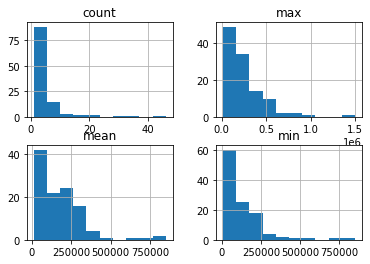

In [100]:
grouped_by_pag.hist()

In [101]:
grouped_by_pag.plot(x="Pagasts", y="mean")

KeyError: 'Pagasts'

In [ ]:
df.to_excel("c:/temp/my_apartments.xlsx") # i could this with absolute path

In [ ]:
from datetime import datetime as dt
now = dt.now()
now.month, now.day, now.hour, now.second

In [ ]:
# url = "https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/hand_over/"
url = centrs
region = url.split("riga/")[-1].split("/")[0]
now = dt.now()
save_path = f"../data/{region}_{now.day}_{now.month}__{now.hour}_{now.second}.xlsx"
save_path

In [ ]:
url = "https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/hand_over/"
region = url.split("riga/")[-1].split("/")[0]
now = dt.now()
save_path = f"../data/{region}_{now.day}_{now.month}__{now.hour}_{now.second}.xlsx"

df = get_all_ads_df(url, save_path)

In [ ]:
url = "https://www.ss.com/lv/transport/cars/vaz/riga_f/"
df = get_all_ads_df(url, "../data/vaz_18_03.xlsx")

# TODO 
# Try with different starting address not only centrs
## Maybe combine regions
## See how it would work with maybe cars
## Data engineering make new columns based on existing ones, clean some columns
### Changing floors 2/6 to columns 2 and 6, clean up Euro signs
## Sorting, Describing, Grouping by regions etc

In [ ]:
df = pd.read_excel("centrs_10_03.xlsx")
df.head()

In [83]:
df.shape

(630, 11)

In [84]:
df["price"] = df.Cena.str.split(' ').str[0]
df.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor,price
0,Augstas kvalitātes Jūgendstila dizaina dzīvokl...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Pulkv. Brieža 11,3,90,3/5,P. kara,"2,889 €","260,000 €",3,5,"260,000"
1,"Balkons, panorāmas skats. \r\nBrīnišķīgs, plaš...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Baznīcas 13,3,126,5/6,P. kara,"2,302 €","290,000 €",5,6,"290,000"
2,"Par samazinātu cenu, ar apgrūtinājumiem, īpašn...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Ganību d. 13,2,39,2/6,Jaun.,"1,603 €","62,500 €",2,6,"62,500"
3,"Продаю отремонтированную, полностью меблирован...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Hospitāļu 7,3,69,1/5,Specpr.,"1,348 €","93,000 €",1,5,"93,000"
4,"Plašs, pārdomāts studijas tipa dzīvoklis Vecrī...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Jēkaba 26/28,1,54,4/5,Renov.,"1,667 €","90,000 €",4,5,"90,000"


In [85]:
df.price = df.price.str.replace(",","").astype('int32') # so clean string of , and then convert to integer
df.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor,price
0,Augstas kvalitātes Jūgendstila dizaina dzīvokl...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Pulkv. Brieža 11,3,90,3/5,P. kara,"2,889 €","260,000 €",3,5,260000
1,"Balkons, panorāmas skats. \r\nBrīnišķīgs, plaš...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Baznīcas 13,3,126,5/6,P. kara,"2,302 €","290,000 €",5,6,290000
2,"Par samazinātu cenu, ar apgrūtinājumiem, īpašn...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Ganību d. 13,2,39,2/6,Jaun.,"1,603 €","62,500 €",2,6,62500
3,"Продаю отремонтированную, полностью меблирован...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Hospitāļu 7,3,69,1/5,Specpr.,"1,348 €","93,000 €",1,5,93000
4,"Plašs, pārdomāts studijas tipa dzīvoklis Vecrī...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Jēkaba 26/28,1,54,4/5,Renov.,"1,667 €","90,000 €",4,5,90000


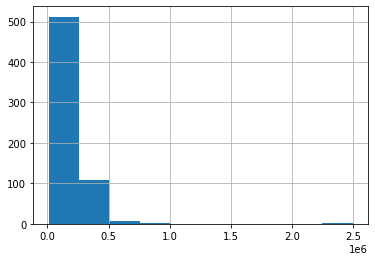

In [86]:
df.price.hist()

In [ ]:
df[['Floor','MaxFloor']] = df.Stāvs.str.split("/",expand=True) 
df.info()

In [87]:
#typecasting example
df.Floor = df.Floor.astype('int32')
df.MaxFloor = df.MaxFloor.astype('int32')

In [88]:
df.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor,price
0,Augstas kvalitātes Jūgendstila dizaina dzīvokl...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Pulkv. Brieža 11,3,90,3/5,P. kara,"2,889 €","260,000 €",3,5,260000
1,"Balkons, panorāmas skats. \r\nBrīnišķīgs, plaš...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Baznīcas 13,3,126,5/6,P. kara,"2,302 €","290,000 €",5,6,290000
2,"Par samazinātu cenu, ar apgrūtinājumiem, īpašn...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Ganību d. 13,2,39,2/6,Jaun.,"1,603 €","62,500 €",2,6,62500
3,"Продаю отремонтированную, полностью меблирован...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Hospitāļu 7,3,69,1/5,Specpr.,"1,348 €","93,000 €",1,5,93000
4,"Plašs, pārdomāts studijas tipa dzīvoklis Vecrī...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Jēkaba 26/28,1,54,4/5,Renov.,"1,667 €","90,000 €",4,5,90000


In [89]:
d23 = df[df.MaxFloor > 20]
d23

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor,price
26,"Pārdodas plašs, ekskluzīvs dzīvoklis ar unikāl...",https://ss.com/msg/lv/real-estate/flats/riga/c...,J. Daliņa 8,3,167,20/22,Jaun.,"4,491 €","750,000 €",20,22,750000
3,Divistabu dzīvoklis projektā “Skanstes virsotn...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Skanstes 29,2,68,12/24,Jaun.,"2,147 €","145,999 €",12,24,145999
29,"Для ценителей просторного жилья, предлагается ...",https://ss.com/msg/lv/real-estate/flats/riga/c...,J. Daliņa 8,4,170,20/24,Jaun.,"4,412 €","750,000 €",20,24,750000
25,Tiek pārdots gaišs un mājīgs 3 istabu dzīvokli...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Grostonas 25,3,109,14/24,Jaun.,"2,339 €","255,000 €",14,24,255000
12,"Īpašnieks pārdod siltu, gaišu un plašu dzīvokl...",https://ss.com/msg/lv/real-estate/flats/riga/c...,J. Daliņa 8,4,130,15/24,Jaun.,"2,692 €","350,000 €",15,24,350000
20,Tiek pārdots gaišs un mājīgs 3 istabu dzīvokli...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Grostonas 25,3,109,14/24,Jaun.,"2,477 €","270,000 €",14,24,270000
8,Ideālais dzīvoklis Tev un tavai ģimenei. Mūsdi...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Grostonas 25,4,112,11/23,Jaun.,"2,850 €","319,200 €",11,23,319200
6,Pārdod plašu 4 istabu dzīvokli Skankstes kvart...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Grostonas 25,4,112,11/23,Jaun.,"2,850 €","319,200 €",11,23,319200


In [90]:
df.describe().T # T is for transposing rows and columns

,count,mean,std,min,25%,50%,75%,max
Floor,630.0,3.446032,2.242694,1.0,2.0,3.0,5.0,20.0
MaxFloor,630.0,5.688889,2.505645,1.0,5.0,5.0,6.0,24.0
price,630.0,167000.236508,150570.766354,8701.0,78000.0,135000.0,219810.0,2500000.0


In [91]:
df.describe().T.to_csv("center_stats.csv")

In [102]:
import plotly.express as px

In [105]:
fig = px.histogram(df, x="price", nbins=100)
fig.show()

In [94]:
import seaborn as sns # seaborn sits on top of matplotlib with better defaults
import matplotlib.pyplot as plt


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 0 to 29
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  630 non-null    object
 1   url          630 non-null    object
 2   Iela         630 non-null    object
 3   Ist.         630 non-null    object
 4   m2           630 non-null    object
 5   Stāvs        630 non-null    object
 6   Sērija       630 non-null    object
 7   Cena, m2     630 non-null    object
 8   Cena         630 non-null    object
 9   Floor        630 non-null    int32 
 10  MaxFloor     630 non-null    int32 
 11  price        630 non-null    int32 
dtypes: int32(3), object(9)
memory usage: 56.6+ KB


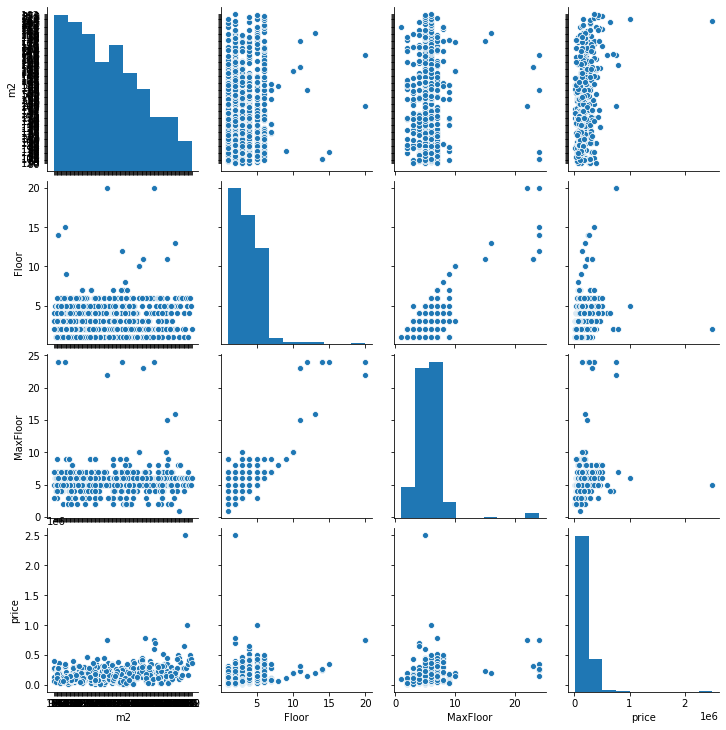

In [96]:
# Basic correlogram
sns.pairplot(df)



In [ ]:
# Basic correlogram
sns.pairplot(df)



In [ ]:
volvo_url = "https://www.ss.com/lv/transport/cars/volvo/sell/"
volvos = get_all_ads_df(volvo_url, "../data/volvo_03_18.xlsx")

In [97]:
volvos = pd.read_excel("volvo_270921.xlsx")
volvos.head()

,Unnamed: 0,description,url,Modelis,Gads,Tilp.,Nobrauk.,Cena
0,0,Auto arī dzīvē tāds kā bildēs. Virsbūve ļoti l...,https://ss.com/msg/lv/transport/cars/volvo/v70...,V70,2002,2.4D,330 tūkst.,"2,300 €"
1,1,"Auto labā tehniskā un vizuālā stāvoklī, auto i...",https://ss.com/msg/lv/transport/cars/volvo/v70...,V70,2003,2.4D,390 tūkst.,"2,600 €"
2,2,Volvo XC 90 2.4 D5 Edition 147 KW / Webasto / ...,https://ss.com/msg/lv/transport/cars/volvo/xc9...,XC 90,2011,2.0D,235 tūkst.,"12,490 €"
3,3,Tikko No Vacijas. Facelift Modelis. Mehaniska ...,https://ss.com/msg/lv/transport/cars/volvo/xc9...,XC 90,2010,2.4D,-,"11,650 €"
4,4,"Volvo V70 Facelift, viens no labākajiem un jau...",https://ss.com/msg/lv/transport/cars/volvo/v70...,V70,2007,2.4D,300 tūkst.,"3,500 €"


In [ ]:
volvos.shape

In [ ]:
volvos.head(10)

In [ ]:
gr_auto['Price'] = 

In [98]:
volvos["price"] = volvos.Cena.str.split(' ').str[0]
volvos.price = volvos.price.str.replace(",","").astype('int32')
volvos.head()

,Unnamed: 0,description,url,Modelis,Gads,Tilp.,Nobrauk.,Cena,price
0,0,Auto arī dzīvē tāds kā bildēs. Virsbūve ļoti l...,https://ss.com/msg/lv/transport/cars/volvo/v70...,V70,2002,2.4D,330 tūkst.,"2,300 €",2300
1,1,"Auto labā tehniskā un vizuālā stāvoklī, auto i...",https://ss.com/msg/lv/transport/cars/volvo/v70...,V70,2003,2.4D,390 tūkst.,"2,600 €",2600
2,2,Volvo XC 90 2.4 D5 Edition 147 KW / Webasto / ...,https://ss.com/msg/lv/transport/cars/volvo/xc9...,XC 90,2011,2.0D,235 tūkst.,"12,490 €",12490
3,3,Tikko No Vacijas. Facelift Modelis. Mehaniska ...,https://ss.com/msg/lv/transport/cars/volvo/xc9...,XC 90,2010,2.4D,-,"11,650 €",11650
4,4,"Volvo V70 Facelift, viens no labākajiem un jau...",https://ss.com/msg/lv/transport/cars/volvo/v70...,V70,2007,2.4D,300 tūkst.,"3,500 €",3500


In [99]:

gr_auto = volvos.groupby(["Gads","Modelis"])["price"].agg(["count", "min", "max", "mean", ])  #.head(n = 10)
gr_auto

count    min    max     mean
Gads Modelis                              
1987 240          1   4700   4700   4700.0
1989 740          1   4499   4499   4499.0
1990 460          1   1500   1500   1500.0
     740          1   3250   3250   3250.0
1992 740          1   1300   1300   1300.0
...             ...    ...    ...      ...
2019 XC 40        3  29900  34590  32560.0
     XC 60        3  28880  37500  33760.0
     XC 90        1  47990  47990  47990.0
2020 S60          1  27900  27900  27900.0
     S90          1  40490  40490  40490.0

[178 rows x 4 columns]

In [ ]:
gr_auto.loc[gr_auto.index.get_level_values(0).str.contains("2015")] # how to filter multi level index

In [ ]:
gr_auto.loc[gr_auto.index.get_level_values(1).str.contains("S60")]

In [ ]:
gr_auto.loc[gr_auto.index.get_level_values(1).str.contains("S60")].to_excel("S60.xlsx")

In [ ]:
print(dt.today())

In [ ]:
suzuki_url = "https://www.ss.com/lv/transport/cars/suzuki/"
# sdf = get_all_ads_df(suzuki_url, f"suzuki_{dt.today()}.xlsx")
sdf = get_all_ads_df(suzuki_url, f"suzuki.xlsx")
sdf.head()

In [ ]:
sdf.info()

In [ ]:
sdf["Tilp."] = sdf["Tilp."].str.replace("\w","", regex=True)
sdf.head()

In [ ]:
sdf["Nobrauk."] = sdf["Nobrauk."].str.replace("\D","", regex=True) # so no digits removed
sdf.head()

In [ ]:
sdf["Cena"] = sdf["Cena"].str.replace("\D","", regex=True) # so no digits removed
sdf.head()

In [ ]:
sdf = sdf.dropna(how="any", axis=0)
sdf

In [ ]:
sdf = sdf[sdf["Nobrauk."].str.len() > 0] # got rid of those empty rows finally
sdf

In [ ]:
sdf["Cena"] = sdf["Cena"].astype("float32")

In [ ]:
gr_auto = sdf.groupby(["Gads","Modelis"])["Cena"].agg(["count","min", "max", "mean"]) 
gr_auto